In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import matplotlib.pyplot as plt


SGS - Sistema Gerenciador de Séries Temporais: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

URL da API: https://api.bcb.gov.br/dados/serie/bcdata.sgs.20542/dados?formato=json

In [106]:
API = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.20542/dados?formato=json'

In [107]:
def pegar_dados_bacen(serie, start_date, end_date):
    # Define uma função para buscar dados de séries temporais da API do BACEN.
    # Recebe como parâmetros: 
    #   - `serie`: Código da série temporal no SGS (ex.: 432 para a Selic).
    #   - `start_date`: Data inicial no formato "dd/mm/aaaa".
    #   - `end_date`: Data final no formato "dd/mm/aaaa".

    url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{serie}/dados"
    # Define a URL base da API do BACEN, substituindo `{serie}` pelo código da série fornecido.

    params = {
        'formato': 'json',
        'dataInicial': start_date,
        'dataFinal': end_date
    }
    # Define os parâmetros da requisição, incluindo:
    #   - `formato`: Define o formato da resposta como JSON.
    #   - `dataInicial` e `dataFinal`: Intervalo de datas especificado pelo usuário.

    response = requests.get(url, params=params)
    # Envia uma requisição HTTP GET para a API, utilizando a URL e os parâmetros definidos.
    # A resposta da API é armazenada na variável `response`.

    data = response.json()
    # Converte a resposta da API, que está em formato JSON, para um dicionário Python.
    # Os dados extraídos são armazenados na variável `data`.

    df = pd.DataFrame(data)
    # Converte o dicionário `data` em um DataFrame do pandas, que facilita a manipulação dos dados.

    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    # Converte a coluna `data` do DataFrame de string para um formato de data (datetime).
    # O parâmetro `dayfirst=True` garante que o formato seja "dd/mm/aaaa".

    df['valor'] = pd.to_numeric(df['valor'], errors='coerce')
    # Converte a coluna `valor` do DataFrame para tipo numérico (float).
    # O parâmetro `errors='coerce'` transforma valores inválidos em NaN.

    return df
    # Retorna o DataFrame contendo os dados da série temporal com colunas limpas e formatadas.


#### Taxa Selic - 432

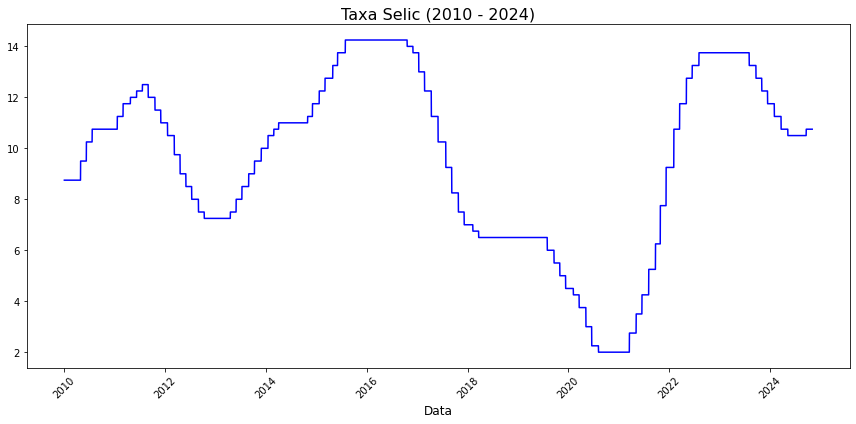

In [127]:
serie = 432  # Código da Taxa Selic
start_date = "01/01/2010"
end_date = "01/11/2024"
selic = pegar_dados_bacen(serie, start_date, end_date)

# Criar o gráfico
plt.figure(figsize=(12, 6))  # Define o tamanho do gráfico
plt.plot(selic['data'], selic['valor'], label='Taxa Selic', color='Blue')

# Configurações do gráfico
plt.title('Taxa Selic (2010 - 2024)', fontsize=16)  # Título
plt.xlabel('Data', fontsize=12)  # Rótulo do eixo X
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

#### IPCA 12 meses - 13522

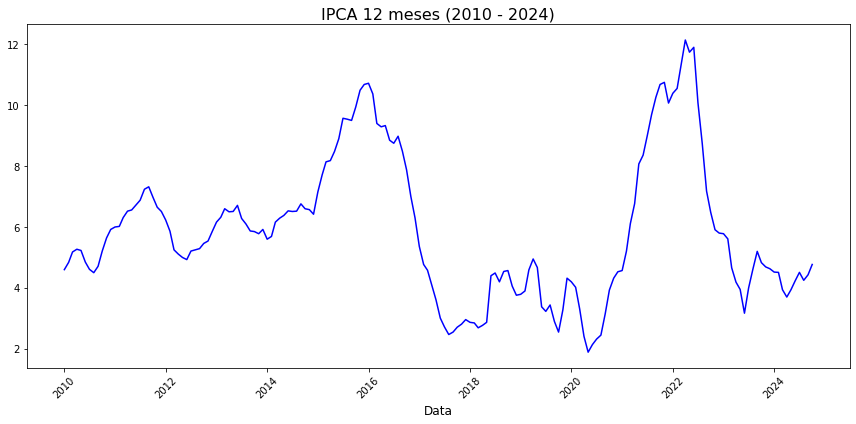

In [129]:
# Definições para o IPCA
serie = 13522  # Código da série do IPCA
start_date = "01/01/2010"
end_date = "01/11/2024"
ipca = pegar_dados_bacen(serie, start_date, end_date)

# Criar o gráfico
plt.figure(figsize=(12, 6))  # Define o tamanho do gráfico
plt.plot(ipca['data'], ipca['valor'], label='IPCA 12 meses', color='Blue')

# Configurações do gráfico
plt.title('IPCA 12 meses (2010 - 2024)', fontsize=16)  # Título
plt.xlabel('Data', fontsize=12)  # Rótulo do eixo X
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

#### Taxa de câmbio - Dólar comercial (venda) - 1

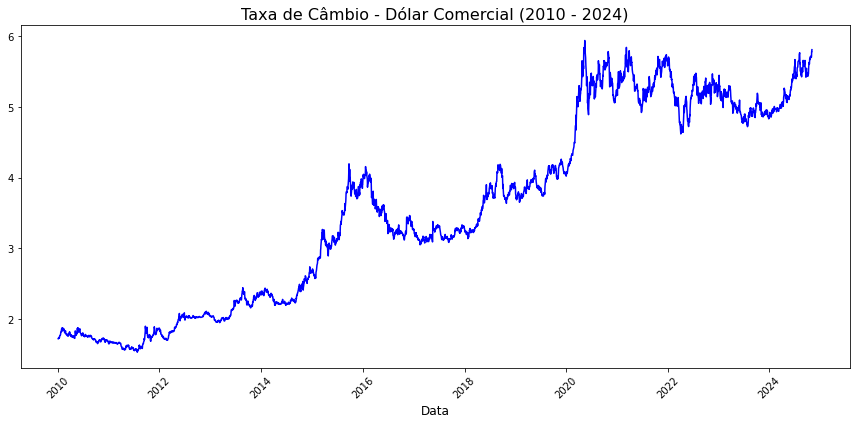

In [130]:
serie = 1
start_date = "01/01/2010"
end_date = "01/11/2024"
dolar = pegar_dados_bacen(serie, start_date, end_date)

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(dolar['data'], dolar['valor'], label='Dólar Comercial (Venda)', color='blue')

# Configurações
plt.title('Taxa de Câmbio - Dólar Comercial (2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

# Exibir
plt.tight_layout()
plt.show()

#### INPC - Índice Nacional de Preços ao Consumidor Var. % mensal - 188

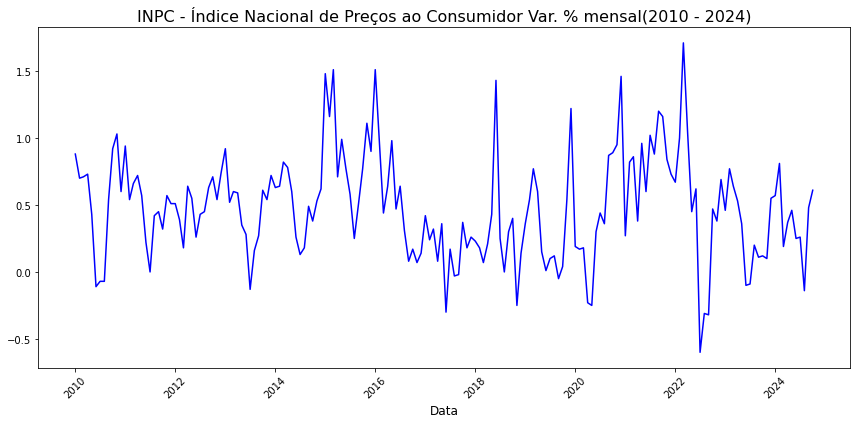

In [131]:
serie = 188
start_date = "01/01/2010"
end_date = "01/11/2024"
inpc = pegar_dados_bacen(serie, start_date, end_date)

plt.figure(figsize=(12, 6))
plt.plot(inpc['data'], inpc['valor'], label='INPC - Índice Nacional de Preços ao Consumidor Var. % mensal', color='Blue')

plt.title('INPC - Índice Nacional de Preços ao Consumidor Var. % mensal(2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### IGP-M - Índice Geral de Preços - Mercado  Var. % mensal - 189

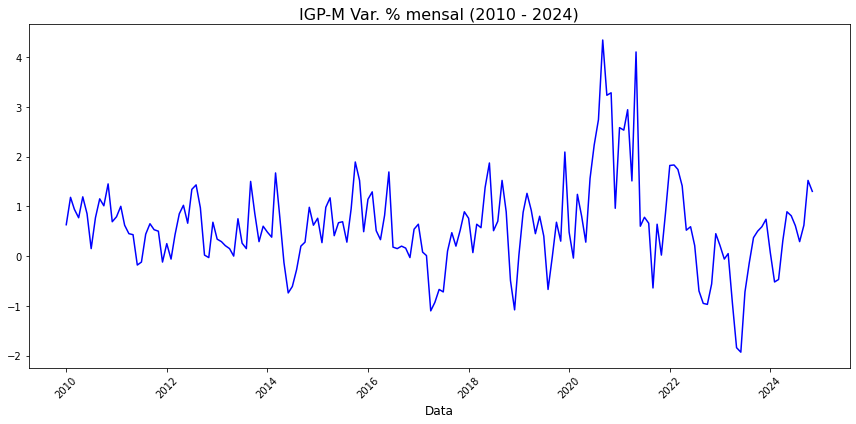

In [132]:
serie = 189  
start_date = "01/01/2010"
end_date = "01/11/2024"
igpm = pegar_dados_bacen(serie, start_date, end_date)

plt.figure(figsize=(12, 6))
plt.plot(igpm['data'], igpm['valor'], label='IGP-M Var. % mensal', color='Blue')

plt.title('IGP-M Var. % mensal (2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### PIB trimestral a preços de mercado Índice - 22099

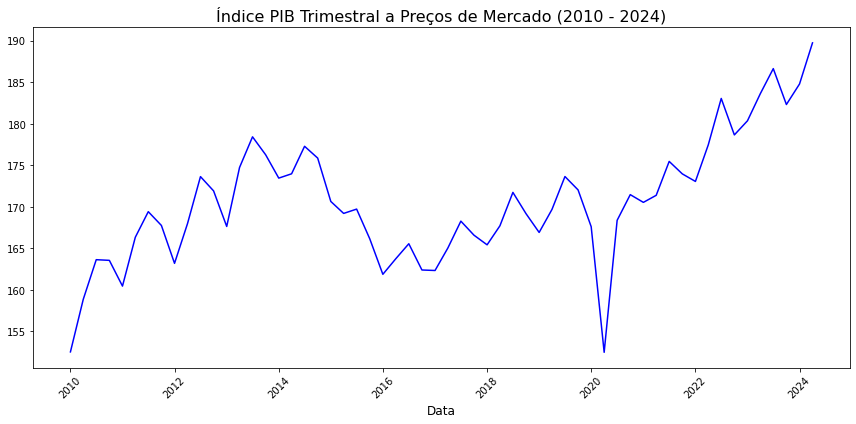

In [134]:
serie = 22099 
start_date = "01/01/2010"
end_date = "01/11/2024"
pib = pegar_dados_bacen(serie, start_date, end_date)

plt.figure(figsize=(12, 6))
plt.plot(pib['data'], pib['valor'], label='PIB Trimestral Índice', color='Blue')

plt.title('Índice PIB Trimestral a Preços de Mercado (2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Dívida bruta do governo geral (% PIB) - 13762

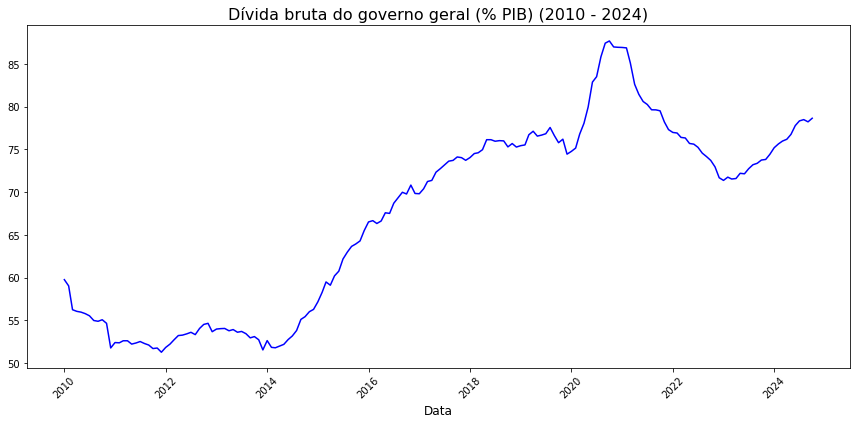

In [135]:
serie = 13762
start_date = "01/01/2010"
end_date = "01/11/2024"
divida = pegar_dados_bacen(serie, start_date, end_date)

plt.figure(figsize=(12, 6))
plt.plot(divida['data'], divida['valor'], label='Dívida Bruta do Governo Geral', color='Blue')

plt.title('Dívida bruta do governo geral (% PIB) (2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Balança comercial e Serviços - saldo mensal  USS (milhões) - 22704

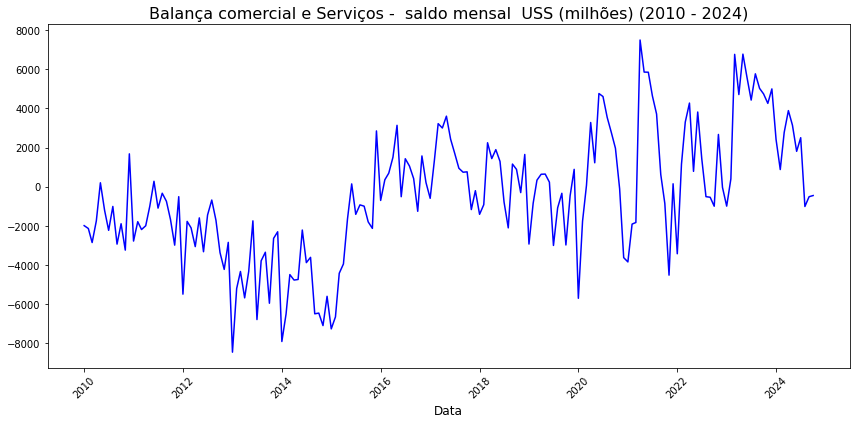

In [136]:
serie = 22704
start_date = "01/01/2010"
end_date = "01/11/2024"
balanca = pegar_dados_bacen(serie, start_date, end_date)

plt.figure(figsize=(12, 6))
plt.plot(balanca['data'], balanca['valor'], label='Balança comercial e Serviços -  saldo mensal  USS (milhões)', color='Blue')

plt.title('Balança comercial e Serviços -  saldo mensal  USS (milhões) (2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Produção Industrial (2012=100)  – Região Sudeste - 21924

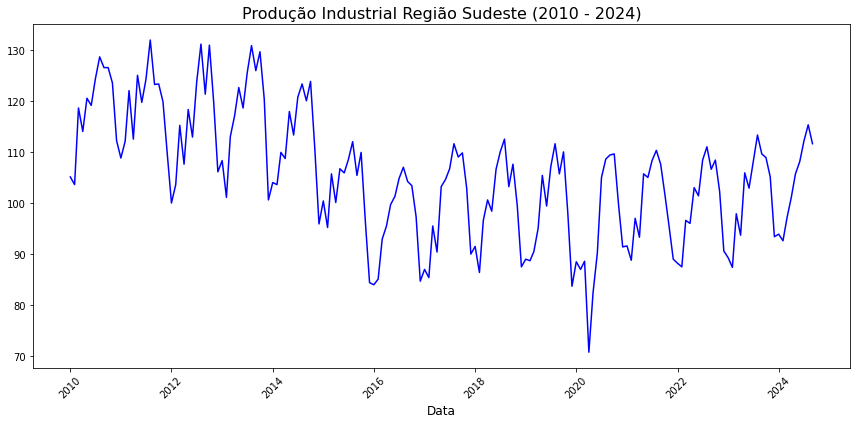

In [137]:
serie = 21924 
start_date = "01/01/2010"
end_date = "01/11/2024"
producao = pegar_dados_bacen(serie, start_date, end_date)

plt.figure(figsize=(12, 6))
plt.plot(producao['data'], producao['valor'], label='Produção Industrial Região Sudeste', color='Blue')

plt.title('Produção Industrial Região Sudeste (2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Reservas Internacionais Líquidas  u.m.c. (milhões) - 29525

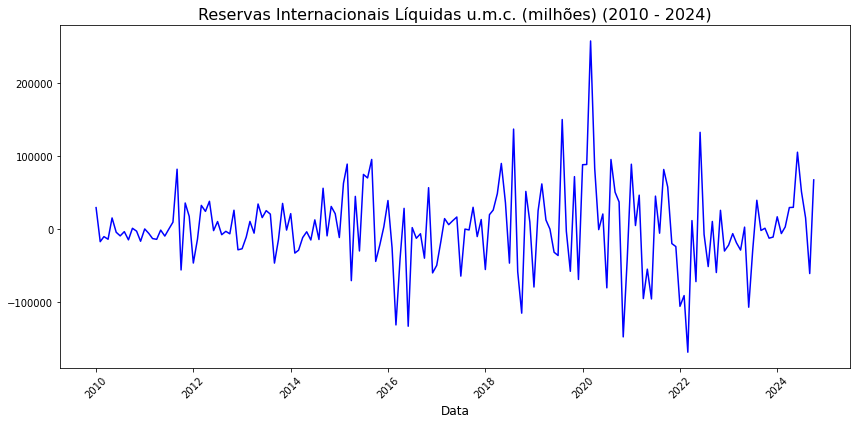

In [138]:
serie = 29525
start_date = "01/01/2010"
end_date = "01/11/2024"
reservas = pegar_dados_bacen(serie, start_date, end_date)

plt.figure(figsize=(12, 6))
plt.plot(reservas['data'], reservas['valor'], label='Reservas Internacionais Líquidas', color='Blue')

plt.title('Reservas Internacionais Líquidas u.m.c. (milhões) (2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Índice de Confiança do Empresário Industrial - 7341

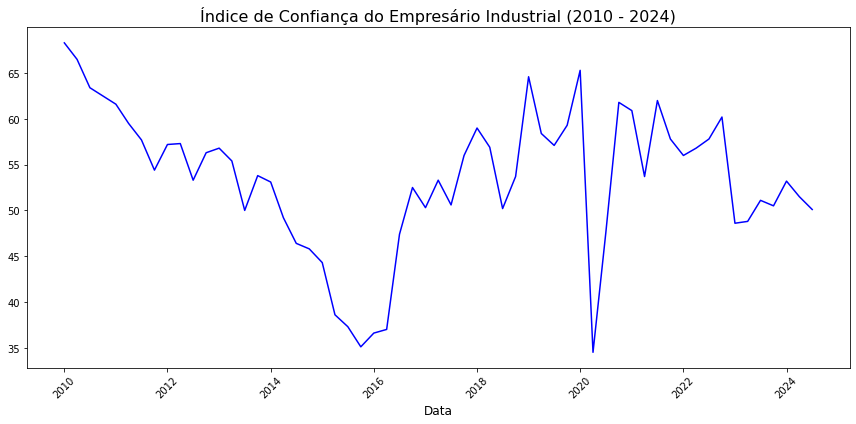

In [139]:
serie = 7341  
start_date = "01/01/2010"
end_date = "01/11/2024"
ICE = pegar_dados_bacen(serie, start_date, end_date)

plt.figure(figsize=(12, 6))
plt.plot(ICE['data'], ICE['valor'], label='Índice de Confiança do Empresário Industrial', color='Blue')

plt.title('Índice de Confiança do Empresário Industrial (2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Índice de Atividade Econômica do BACEN (IBC-Br) - 24363

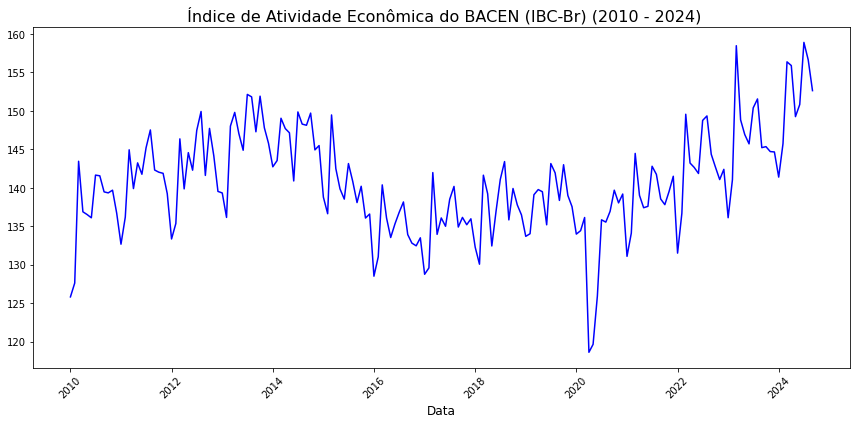

In [140]:
serie = 24363  
start_date = "01/01/2010"
end_date = "01/11/2024"
IBC = pegar_dados_bacen(serie, start_date, end_date)

plt.figure(figsize=(12, 6))
plt.plot(IBC['data'], IBC['valor'], label=' Índice de Atividade Econômica do BACEN (IBC-Br)', color='Blue')

plt.title(' Índice de Atividade Econômica do BACEN (IBC-Br) (2010 - 2024)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()